# Lecture 12 – γ p [solution]

**Invariant masses of particle pairs and Dalitz plots for another reaction with three particles in the final state $\gamma p\rightarrow \pi^+\pi^-p$.**

Prepare the notebook with the preambles for the inclusion of pandas, numpy and matplotlib.pyplot:

In [1]:
%pip install -q matplotlib numpy pandas pylorentz scipy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
!pip install gdown
import gdown

In [4]:
# real experimental data
# gammap_5GeV_PiPlusPiMinusProtWHel_inclusive_gold2bG14.csv
url = 'https://drive.google.com/uc?id=1qiYjPbR5nx3_Sw7MXuUKhNAUpkXPoxYh'

output = 'gammapi_2pions_inclusive.dat'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1qiYjPbR5nx3_Sw7MXuUKhNAUpkXPoxYh
To: /content/gammapi_2pions_inclusive.dat
100%|██████████| 95.6M/95.6M [00:00<00:00, 226MB/s]


Inspect the data file and format. The file contains the 4-momenta of the particles of the reaction $\gamma p \rightarrow \pi^+\pi^- p$, the last column corresponds to the 3rd component of the photon momentum (up to 2.5 GeV/c), which travels along the $z$ axis. Since the target was made of HD, to select the data interacting on protons only a cut on the missing momentum of the reaction was made.

In [5]:
data.head()

,p1x,p1y,p1z,E1,p2x,p2y,p2z,E2,p3x,p3y,p3z,E3,pgamma,helGamma,
0,0.517085,0.161989,0.731173,0.920732,-0.254367,0.082889,0.495509,0.580189,-0.259266,-0.265152,0.445175,1.10275,1.65780,-1,
1,-0.216852,-0.245333,0.107538,0.371878,-0.183380,0.191897,0.145128,0.333213,0.389750,0.112110,0.790133,1.29195,1.04479,-1,
2,0.197931,0.071432,-0.010077,0.252778,-0.111780,-0.360482,0.367842,0.545221,-0.090228,0.302313,0.724911,1.22694,1.09547,-1,
3,-0.505371,-0.163949,0.450407,0.710395,-0.141057,0.282404,1.186530,1.235730,0.679497,-0.112014,0.729706,1.37371,2.38869,-1,
4,0.260706,-0.330303,0.385968,0.587839,0.163863,0.354007,0.286983,0.504031,-0.490385,-0.019313,0.879568,1.37653,1.45488,1,


The columns headers present some trailing blanks, that must be dropped to be able to use correctly the DataFormat structure (if not, they deliver an error message). To do so, the *str.strip()* function must be used beforehand to reformat the column shape.
In the following commands in the cell, columns are shown, overall with the data.columns command, and per single variable (like *data.p2x*). If the format is correct, no error should appear.

In [6]:
data.columns = data.columns.str.strip()
data.p2x

0        -0.254367
1        -0.183380
2        -0.111780
3        -0.141057
4         0.163863
            ...   
701969    0.378718
701970    0.330904
701971   -0.274412
701972    0.034110
701973   -0.122702
Name: p2x, Length: 701974, dtype: float64

Evaluate the invariant masses (squared and linear) for particle pairs, in a similar way as done in the first example.

In [7]:
invariant_massSquared12 = (
    (data.E1 + data.E2) ** 2
    - (data.p1x + data.p2x) ** 2
    - (data.p1y + data.p2y) ** 2
    - (data.p1z + data.p2z) ** 2
)
invariant_mass12 = np.sqrt(invariant_massSquared12)
invariant_massSquared13 = (
    (data.E1 + data.E3) ** 2
    - (data.p1x + data.p3x) ** 2
    - (data.p1y + data.p3y) ** 2
    - (data.p1z + data.p3z) ** 2
)
invariant_mass13 = np.sqrt(invariant_massSquared13)
invariant_massSquared23 = (
    (data.E3 + data.E2) ** 2
    - (data.p3x + data.p2x) ** 2
    - (data.p3y + data.p2y) ** 2
    - (data.p3z + data.p2z) ** 2
)
invariant_mass23 = np.sqrt(invariant_massSquared23)

Let's plot the evaluated invariant masses. First, though, let's plot the antineutron momentum to see how the distribution looks like.

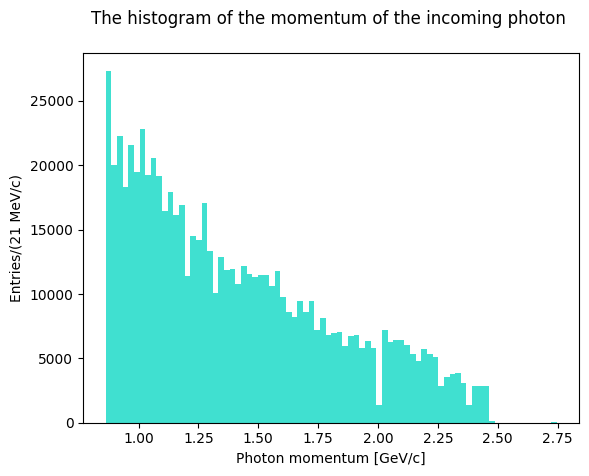

In [8]:
plt.hist(data.pgamma, bins=80, color="turquoise")
plt.xlabel("Photon momentum [GeV/c]")
plt.ylabel("Entries/(21 MeV/c)")
plt.title("The histogram of the momentum of the incoming photon \n")
plt.show()

Let's plot now the invariant masses distributions for the three pion pairs:

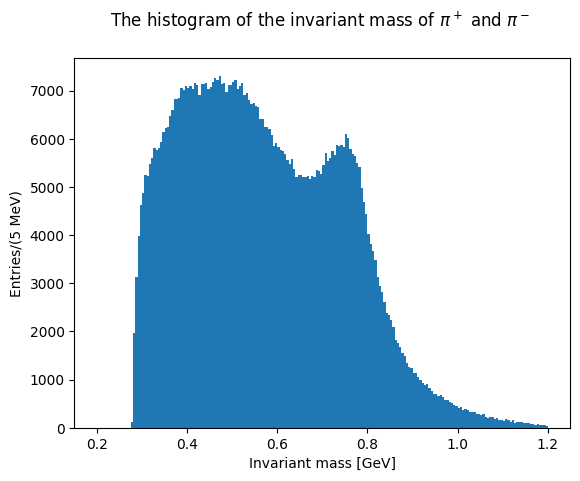

In [9]:
# plot the histogram pi+pi-
plt.hist(invariant_mass12, bins=200, range=(0.2, 1.2))
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Entries/(5 MeV)")
plt.title("The histogram of the invariant mass of $\pi^+$ and $\pi^-$ \n")
plt.show()

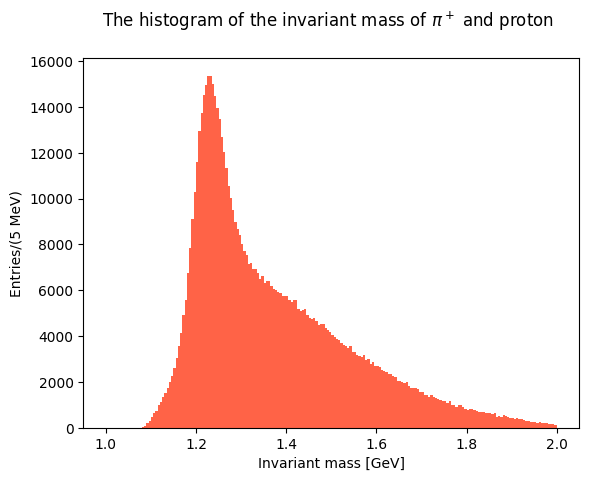

In [10]:
# plot the histogram pi+proton
plt.hist(invariant_mass13, bins=200, color="tomato", range=(1.0, 2.0))
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Entries/(5 MeV)")
plt.title("The histogram of the invariant mass of $\pi^+$ and proton  \n")
plt.show()

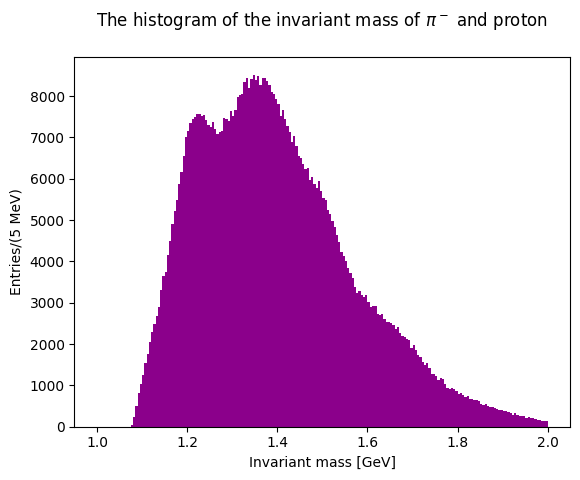

In [11]:
# plot the histogram pi-proton
plt.hist(invariant_mass23, bins=200, color="darkmagenta", range=(1.0, 2.0))
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Entries/(5 MeV)")
plt.title("The histogram of the invariant mass of $\pi^-$ and proton \n")
plt.show()

You can superimpose the two last plots to check the differences in the lineshapes of the two distributions.

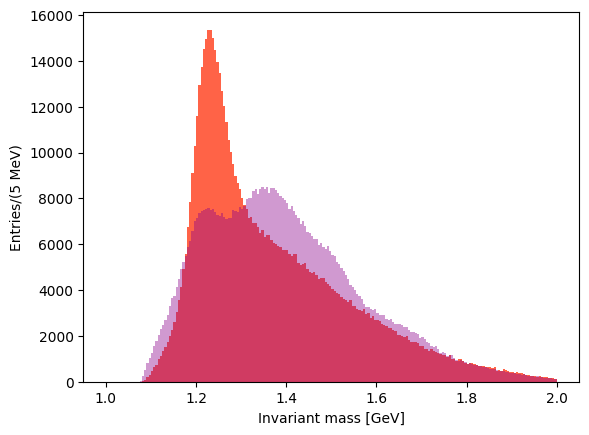

In [12]:
plt.hist(invariant_mass13, bins=200, color="tomato", range=(1.0, 2.0))
plt.hist(invariant_mass23, bins=200, color="darkmagenta", alpha=0.4, range=(1.0, 2.0))
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Entries/(5 MeV)")
plt.show()

2D distributions: Dalitz plots

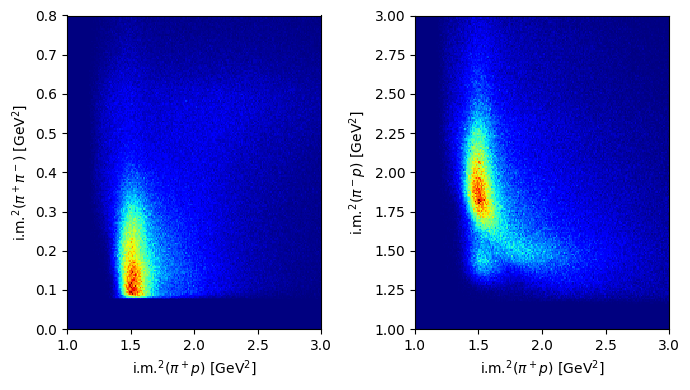

In [13]:
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(7, 4))
ax[0].hist2d(
    invariant_massSquared13,
    invariant_massSquared12,
    bins=200,
    range=[[1.0, 3], [0.0, 0.8]],
    cmap="jet",
)
ax[0].set_xlabel("i.m.$^2(\pi^+p$) [GeV$^2$]")
ax[0].set_ylabel("i.m.$^2(\pi^+\pi^-$) [GeV$^2$]")
ax[1].hist2d(
    invariant_massSquared13,
    invariant_massSquared23,
    bins=200,
    range=[[1.0, 3], [1.0, 3.0]],
    cmap="jet",
)
ax[1].set_xlabel("i.m.$^2(\pi^+p$) [GeV$^2$]")
ax[1].set_ylabel("i.m.$^2(\pi^-p$) [GeV$^2$]")
plt.show()

How do Dalitz plots look like with MonteCarlo generated data?
Repeat the previous procedures with a new file, corresponding to generated data from the same reaction, and compare the shapes (statistics are different)

In [14]:
# mc generated  data
# gen_gammap5GeV_PipPimP.csv
url = 'https://drive.google.com/uc?id=11J0xaQLRMxzgQLXEhXZb_u4mnxp8RVPO'

outputmc = 'gammapi_2pions_inclusive_mcarlo.dat'
gdown.download(url, outputmc, quiet=False)
mc = pd.read_csv(outputmc)

Downloading...
From: https://drive.google.com/uc?id=11J0xaQLRMxzgQLXEhXZb_u4mnxp8RVPO
To: /content/gammapi_2pions_inclusive_mcarlo.dat
100%|██████████| 6.68M/6.68M [00:00<00:00, 48.6MB/s]


In [15]:
mc.columns = mc.columns.str.strip()

In [16]:
invariant_massSquared12mc = (
    (mc.E1 + mc.E2) ** 2
    - (mc.p1x + mc.p2x) ** 2
    - (mc.p1y + mc.p2y) ** 2
    - (mc.p1z + mc.p2z) ** 2
)
invariant_massSquared13mc = (
    (mc.E1 + mc.E3) ** 2
    - (mc.p1x + mc.p3x) ** 2
    - (mc.p1y + mc.p3y) ** 2
    - (mc.p1z + mc.p3z) ** 2
)
invariant_massSquared23mc = (
    (mc.E3 + mc.E2) ** 2
    - (mc.p3x + mc.p2x) ** 2
    - (mc.p3y + mc.p2y) ** 2
    - (mc.p3z + mc.p2z) ** 2
)

The phase space simulation was done extracting the photon momentum from the real data distribution.

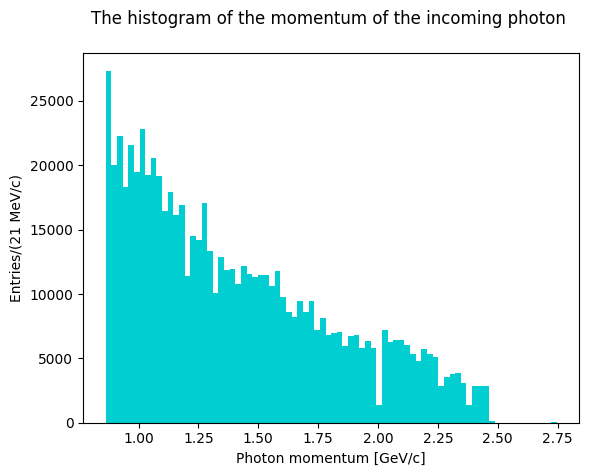

In [17]:
plt.hist(data.pgamma, bins=80, color="darkturquoise")
plt.xlabel("Photon momentum [GeV/c]")
plt.ylabel("Entries/(21 MeV/c)")
plt.title("The histogram of the momentum of the incoming photon \n")
plt.show()

Let's see the invariant masses histogram shapes using phase space Monte Carlo events.

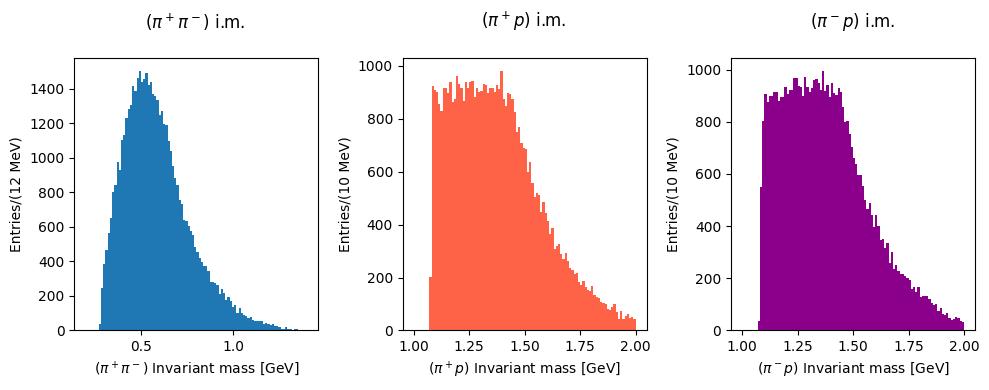

In [18]:
fig, ax = plt.subplots(1, 3, tight_layout=True, figsize=(10, 4))

# plot the histogram pi+pi-
ax[0].hist(np.sqrt(invariant_massSquared12mc), bins=100, range=(0.2, 1.4))
ax[0].set_xlabel("($\pi^+\pi^-$) Invariant mass [GeV]")
ax[0].set_ylabel("Entries/(12 MeV)")
ax[0].set_title("($\pi^+\pi^-$) i.m. \n")
# plot the histogram pi+p
ax[1].hist(
    np.sqrt(invariant_massSquared13mc), color="tomato", bins=100, range=(1.0, 2.0)
)
ax[1].set_xlabel("($\pi^+p$) Invariant mass [GeV]")
ax[1].set_ylabel("Entries/(10 MeV)")
ax[1].set_title("($\pi^+p$) i.m. \n")
# plot the histogram pi-pi-
ax[2].hist(
    np.sqrt(invariant_massSquared23mc), bins=100, color="darkmagenta", range=(1.0, 2.0)
)
ax[2].set_xlabel("($\pi^-p$) Invariant mass [GeV]")
ax[2].set_ylabel("Entries/(10 MeV)")
ax[2].set_title("($\pi^-p$) i.m. \n")
plt.show()

And now the Dalitz plots:

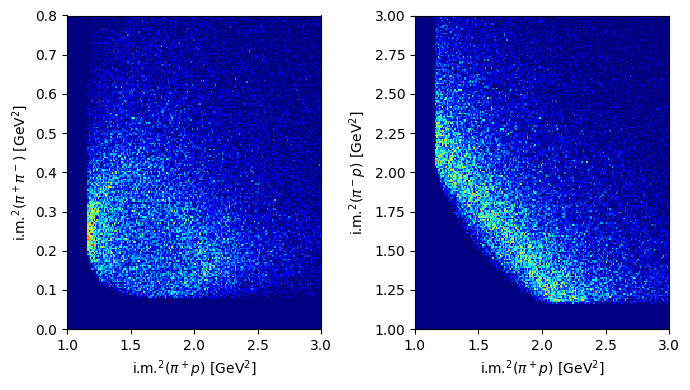

In [19]:
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(7, 4))
ax[0].hist2d(
    invariant_massSquared13mc,
    invariant_massSquared12mc,
    bins=200,
    range=[[1.0, 3], [0.0, 0.8]],
    cmap="jet",
)
ax[0].set_xlabel("i.m.$^2(\pi^+p$) [GeV$^2$]")
ax[0].set_ylabel("i.m.$^2(\pi^+\pi^-$) [GeV$^2$]")
ax[1].hist2d(
    invariant_massSquared13mc,
    invariant_massSquared23mc,
    bins=200,
    range=[[1.0, 3], [1.0, 3.0]],
    cmap="jet",
)
ax[1].set_xlabel("i.m.$^2(\pi^+p$) [GeV$^2$]")
ax[1].set_ylabel("i.m.$^2(\pi^-p$) [GeV$^2$]")
plt.show()



---



Now, let's take a look to the missing mass distribution (final - initial
state). Let's start from the real data using the pylorentz package to build 4-vectors (first, work out *relativisticKinematics.ipynb* notebook).

In [20]:
import math

from pylorentz import Momentum4

# final state
p1T = np.sqrt(data.p1x**2 + data.p1y**2)
p1mod = np.sqrt(p1T**2 + data.p1z**2)
eta1 = np.arcsinh(data.p1z / p1T)
phi1 = np.arctan2(data.p1y, data.p1x)
pionPlus = Momentum4.e_eta_phi_p(data.E1, eta1, phi1, p1mod)

p2T = np.sqrt(data.p2x**2 + data.p2y**2)
p2mod = np.sqrt(p2T**2 + data.p2z**2)
eta2 = np.arcsinh(data.p2z / p2T)
phi2 = np.arctan2(data.p2y, data.p2x)
pionMinus = Momentum4.e_eta_phi_p(data.E2, eta2, phi2, p2mod)

p3T = np.sqrt(data.p3x**2 + data.p3y**2)
p3mod = np.sqrt(p3T**2 + data.p3z**2)
eta3 = np.arcsinh(data.p3z / p3T)
phi3 = np.arctan2(data.p3y, data.p3x)
proton = Momentum4.e_eta_phi_p(data.E3, eta3, phi3, p3mod)

# initial state
# len is the number of events read by the csv file
len = len(data.pgamma)
pgamT = np.zeros(len)
pgammod = data.pgamma
etagam = 1.0e11 * np.ones(len)
phigam = np.zeros(len)
massGamma = 0.0
Egamma = np.sqrt(massGamma**2 + pgammod**2)
photon = Momentum4.e_eta_phi_p(Egamma, etagam, phigam, pgammod)

# the target (proton) is at rest
massProton = 0.93827
ETgt = massProton * np.ones(len)
etaTgt = np.zeros(len)
phiTgt = np.zeros(len)
pTgt = np.zeros(len)
protonTarget = Momentum4.e_eta_phi_p(ETgt, etaTgt, phiTgt, pTgt)

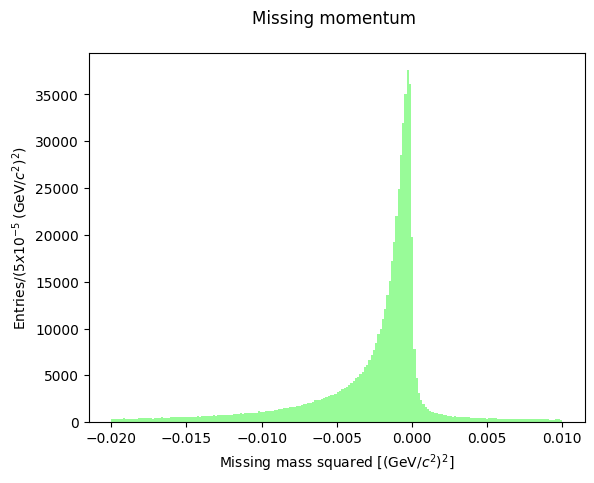

In [21]:
init = photon + protonTarget
final = pionPlus + pionMinus + proton
missingMomentum = final - init

plt.hist(missingMomentum.m2, bins=200, color="palegreen", range=(-0.02, 0.01))
plt.xlabel("Missing mass squared [$(\mathrm{GeV}/c^2)^2$]")
plt.ylabel("Entries/($5x10^{-5}\;(\mathrm{GeV}/c^2)^2$)")
plt.title("Missing momentum \n")
plt.show()

The missing mass square is always negative: this means that the total energy of the initial state exceeds the measured energy of the final state, so there is (likely) a missing particle which carries away some energy. We know that the reaction occurred on a HD molecule as a target: this means that a recoiling neutron is present in all cases when the reaction occurred on a deuteron nucleus: $\gamma p(n)\rightarrow \pi^+\pi^- p (n)$. In this case, moreover, the hit proton is not at rest but it may have a momentum (called Fermi momentum) which, in the deuteron center-of-mass, is roughly distributed as a gaussian 50 MeV/c wide, with maximum at abouth 270 MeV/c. The missing mass momentum distribution shows the effect of the presence of a non-null Fermi momentum, and the possible contribution to the reaction kinematics of the spectator neutron.

In the data selection procedure, the Fermi momentum was required not to exceed 100 MeV/c to preserve the condition that the neutron is a spectator in the reaction occurring on deuteron. Let's see the shape of the missing momentum distribution:  

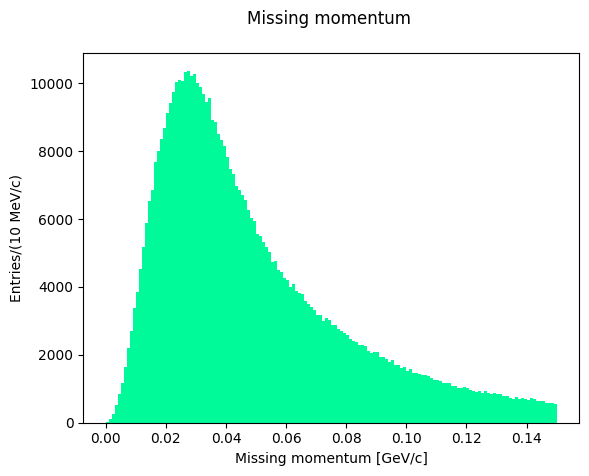

In [22]:
plt.hist(missingMomentum.p, bins=150, color="mediumspringgreen", range=(0.0, 0.150))
plt.xlabel("Missing momentum [GeV/c]")
plt.ylabel("Entries/(10 MeV/c)")
plt.title("Missing momentum \n")
plt.show()

Let's now consider the missing mass recoiling against the neutral dipion: in an exclusive reaction we expect it to peak at the proton mass. Is the PID selection of our sample acceptable?

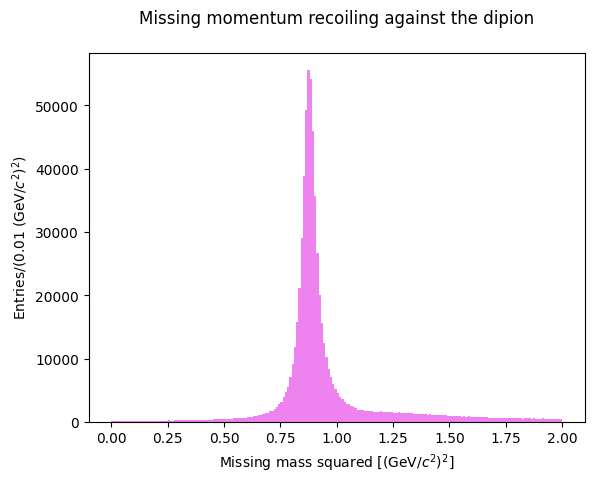

In [23]:
dipion = pionPlus + pionMinus
missingMomentumDipion = init - dipion

plt.hist(missingMomentumDipion.m2, bins=200, color="violet", range=(0.0, 2))
plt.xlabel("Missing mass squared [$(\mathrm{GeV}/c^2)^2$]")
plt.ylabel("Entries/($0.01\;(\mathrm{GeV}/c^2)^2$)")
plt.title("Missing momentum recoiling against the dipion\n")
plt.show()

Let's visualize the scatter plot of the two missing masses squared:

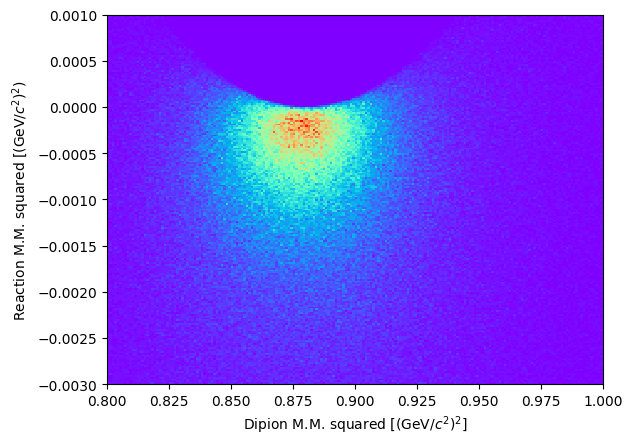

In [24]:
fig = plt.figure()
plt.hist2d(
    missingMomentumDipion.m2,
    missingMomentum.m2,
    bins=200,
    range=[[0.80, 1.0], [-0.003, 0.001]],
    cmap="rainbow",
)
plt.xlabel("Dipion M.M. squared [$(\mathrm{GeV}/c^2)^2$]")
plt.ylabel("Reaction M.M. squared [$(\mathrm{GeV}/c^2)^2$)")
plt.show()

---

## Let's do some fits
Which is the maximum of the missing momentum, and where is the peak of the
missing mass distribution?
Let's attempt two fits with a single gaussian function.


Fit parameters: 
C =  0.011005709743577008 +- 3.732733551478205e-05
X_mean = 0.027786976736489354 +- 0.00012906543968641603
sigma =  0.014235101514555967 +- 0.0002582282909194536




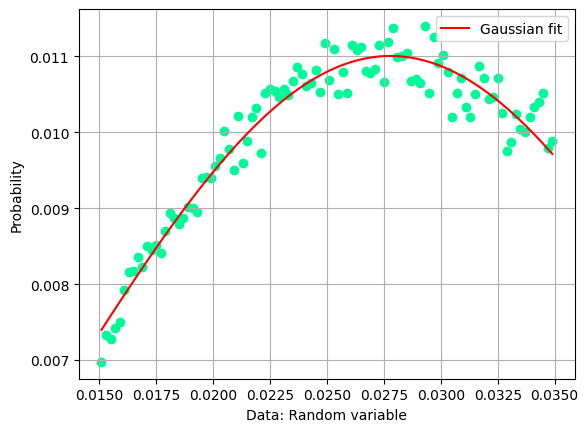

In [25]:
from numpy import exp
from scipy import stats
from scipy.optimize import curve_fit

# normalize the histogram to 1
lowEdge = 0.015
upEdge = 0.035
hist, bin_edges = np.histogram(missingMomentum.p, 100, range=(lowEdge, upEdge))
integralHist = sum(hist)
hist = hist / integralHist

n = hist.size
x_hist = np.zeros((n), dtype=float)
for ii in range(n):
    x_hist[ii] = (bin_edges[ii + 1] + bin_edges[ii]) / 2

y_hist = hist


# Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X, C, X_mean, sigma):
    return C * exp(-((X - X_mean) ** 2) / (2 * sigma**2))


mean = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mean) ** 2) / sum(y_hist)

# Gaussian least-square fitting process
param_optimised, param_covariance_matrix = curve_fit(
    gaus, x_hist, y_hist, p0=[max(y_hist), mean, sigma], maxfev=5000
)

# print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-", np.sqrt(param_covariance_matrix[0, 0]))
print("X_mean =", param_optimised[1], "+-", np.sqrt(param_covariance_matrix[1, 1]))
print("sigma = ", param_optimised[2], "+-", np.sqrt(param_covariance_matrix[2, 2]))
print("\n")


# STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
fig = plt.figure()
x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
# this plots the curve only
plt.plot(x_hist_2, gaus(x_hist_2, *param_optimised), color="red", label="Gaussian fit")
plt.legend()

# plot the experimental point of the portion of spectrum to be fitted
plt.scatter(x_hist, y_hist, color="mediumspringgreen")

# Normalise the histogram values
weights = np.ones_like(y_hist) / y_hist.size
# plt.hist(x_hist, weights=weights)
# plt.hist(x_hist)
# plt.hist(hist)


# setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

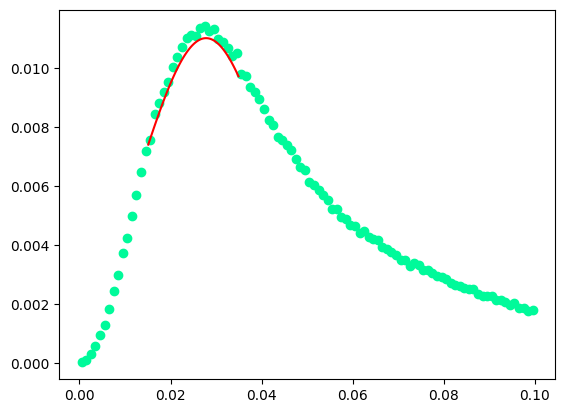

In [26]:
# normalize the histogram to 1 and then to ratio of the maximum values
histfull, bin_edgesf = np.histogram(missingMomentum.p, 100, range=(0.0, 0.10))
n = histfull.size
xf_hist = np.zeros((n), dtype=float)
ilow = 0
iup = 0
# find the bin numbers corresponding to fitted histrogram edges
for ii in range(n):
    xf_hist[ii] = (bin_edgesf[ii + 1] + bin_edgesf[ii]) / 2
    # find the closest bin to edges
    if bin_edgesf[ii + 1] <= lowEdge:
        ilow = ii
    if bin_edgesf[ii + 1] <= upEdge:
        iup = ii


integralFull = sum(histfull)
histfull = histfull / integralFull
yf_hist = histfull
histfull = histfull * np.max(y_hist) / np.max(yf_hist)
yf_hist = histfull

plt.scatter(xf_hist, yf_hist, color="mediumspringgreen")

x_hist_3 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
plt.plot(x_hist_3, gaus(x_hist_3, *param_optimised), color="red")  # was 'r.:'
plt.show()

Fit parameters: 
C =  0.011425786457275298 +- 7.980412291207278e-05
X_mean = -0.00029890467303904025 +- 1.4417745309981776e-05
sigma =  0.0006508651338504216 +- 2.1985899655909954e-05




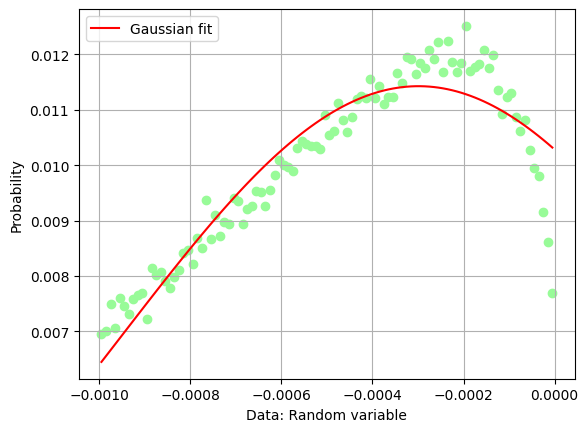

In [27]:
# normalize the histogram to 1
lowEdge = -0.001
upEdge = 0.0
hist, bin_edges = np.histogram(missingMomentum.m2, 100, range=(lowEdge, upEdge))
integralHist = sum(hist)
hist = hist / integralHist

n = hist.size
x_hist = np.zeros((n), dtype=float)
for ii in range(n):
    x_hist[ii] = (bin_edges[ii + 1] + bin_edges[ii]) / 2

y_hist = hist
mean = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mean) ** 2) / sum(y_hist)
# Gaussian least-square fitting process
param_optimised, param_covariance_matrix = curve_fit(
    gaus, x_hist, y_hist, p0=[max(y_hist), mean, sigma], maxfev=5000
)

# print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-", np.sqrt(param_covariance_matrix[0, 0]))
print("X_mean =", param_optimised[1], "+-", np.sqrt(param_covariance_matrix[1, 1]))
print("sigma = ", param_optimised[2], "+-", np.sqrt(param_covariance_matrix[2, 2]))
print("\n")

# save the values for later
mean1Fit = param_optimised[1]
sigma1Fit = param_optimised[2]

# STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
fig = plt.figure()
x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
# this plots the curve only
plt.plot(x_hist_2, gaus(x_hist_2, *param_optimised), color="red", label="Gaussian fit")
plt.legend()

# plot the experimental point of the portion of spectrum to be fitted
plt.scatter(x_hist, y_hist, color="palegreen")

# setting the label,title and grid of the plot
plt.xlabel("Data: Random variable")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

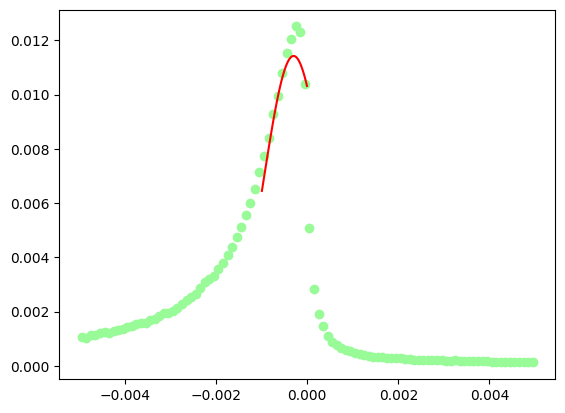

In [28]:
# normalize the histogram to 1 and then to ratio of the maximum values
histfull, bin_edgesf = np.histogram(missingMomentum.m2, 100, range=(-0.005, 0.005))
n = histfull.size
xf_hist = np.zeros((n), dtype=float)

# find the bin numbers
for ii in range(n):
    xf_hist[ii] = (bin_edgesf[ii + 1] + bin_edgesf[ii]) / 2

integralFull = sum(histfull)
histfull = histfull / integralFull
yf_hist = histfull
histfull = histfull * np.max(y_hist) / np.max(yf_hist)
yf_hist = histfull

plt.scatter(xf_hist, yf_hist, color="palegreen")
x_hist_3 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
plt.plot(x_hist_3, gaus(x_hist_3, *param_optimised), color="red")
plt.show()

The fit of the missing mass peak is not really very good, one should add some sort of background on the left hand side of the peak, say a 3rd degree polynomial

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fit parameters: 
C =  0.012374654548228295 +- inf
X_mean = -0.0003200492404461684 +- inf
sigma =  5.5094292099376265e-09 +- inf


missing mass at the peak  0.017889920079367832  GeV/c2 



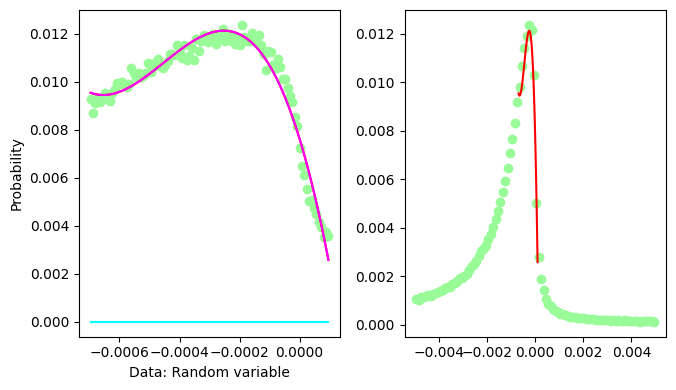

In [29]:
# normalize the histogram to 1
lowEdge = -0.0007
upEdge = 0.0001
hist, bin_edges = np.histogram(missingMomentum.m2, 100, range=(lowEdge, upEdge))
integralHist = sum(hist)
hist = hist / integralHist

n = hist.size
x_hist = np.zeros((n), dtype=float)
for ii in range(n):
    x_hist[ii] = (bin_edges[ii + 1] + bin_edges[ii]) / 2

y_hist = hist
mean = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mean) ** 2) / sum(y_hist)
# mean = mean1Fit
# sigma = sigma1Fit
P1 = 0.0
P2 = 0.0
P3 = 0.0
P4 = 0.0


# Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gausAndBCK(X, C, X_mean, sigma, P1, P2, P3, P4):
    return C * exp(-((X - X_mean) ** 2) / (2 * sigma**2)) + (
        P1 + P2 * X + P3 * X * X + P4 * X * X * X
    )


def BCK(X, P1, P2, P3, P4):
    return P1 + P2 * X + P3 * X * X + P4 * X * X * X


# Gaussian+BCK least-square fitting process
param_optimised, param_covariance_matrix = curve_fit(
    gausAndBCK,
    x_hist,
    y_hist,
    p0=[max(y_hist), mean, sigma, P1, P2, P3, P4],
    maxfev=10000,
)

# print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-", np.sqrt(param_covariance_matrix[0, 0]))
print("X_mean =", param_optimised[1], "+-", np.sqrt(param_covariance_matrix[1, 1]))
print("sigma = ", param_optimised[2], "+-", np.sqrt(param_covariance_matrix[2, 2]))
print("\n")
print("missing mass at the peak ", np.sqrt(abs(param_optimised[1])), " GeV/c2 \n")

param_optimised_gauss = []
param_optimised_bck = []
param_optimised_gauss.append(param_optimised[0])
param_optimised_gauss.append(param_optimised[1])
param_optimised_gauss.append(param_optimised[2])
param_optimised_bck.append(param_optimised[3])
param_optimised_bck.append(param_optimised[4])
param_optimised_bck.append(param_optimised[5])
param_optimised_bck.append(param_optimised[6])

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(7, 4))
x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
# this plots the curve only
ax[0].plot(
    x_hist_2, gausAndBCK(x_hist_2, *param_optimised), color="red", label="Gaussian fit"
)
ax[0].plot(x_hist_2, gaus(x_hist_2, *param_optimised_gauss), color="cyan")
ax[0].plot(x_hist_2, BCK(x_hist_2, *param_optimised_bck), color="magenta")

# plot the experimental point of the portion of spectrum to be fitted
ax[0].scatter(x_hist, y_hist, color="palegreen")

# setting the label,title and grid of the plot

ax[0].set_xlabel("Data: Random variable")
ax[0].set_ylabel("Probability")

# full plot
histfull, bin_edgesf = np.histogram(missingMomentum.m2, 100, range=(-0.005, 0.005))
n = histfull.size
xf_hist = np.zeros((n), dtype=float)

# find the bin numbers
for ii in range(n):
    xf_hist[ii] = (bin_edgesf[ii + 1] + bin_edgesf[ii]) / 2

integralFull = sum(histfull)
histfull = histfull / integralFull
yf_hist = histfull
histfull = histfull * np.max(y_hist) / np.max(yf_hist)
yf_hist = histfull

plt.scatter(xf_hist, yf_hist, color="palegreen")
x_hist_3 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
plt.plot(x_hist_3, gausAndBCK(x_hist_3, *param_optimised), color="red")
plt.show()

It looks like the Gaussian contribution is refused by the fit.

Let's make a similar fit for the missing mass recoiling against the dipion:

Fit parameters: 
C =  0.01575028042415391 +- 0.00020064999359329676
X_mean = 0.8788503281352017 +- 0.0001461108225442943
sigma =  0.02245277193520005 +- 0.0002493807482134945


missing mass at the peak  0.9374701745310097  GeV/c2 



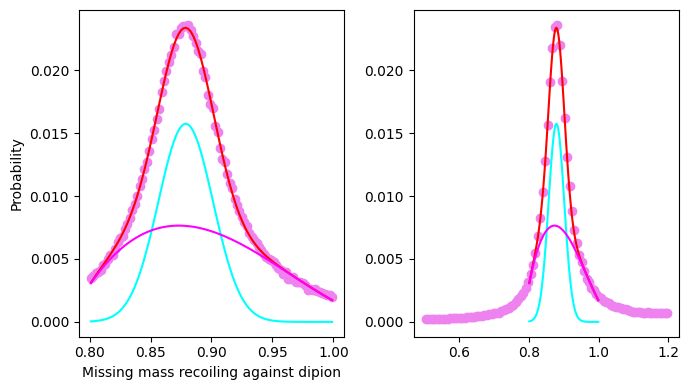

In [30]:
# normalize the histogram to 1
lowEdge = 0.8
upEdge = 1.0
hist, bin_edges = np.histogram(missingMomentumDipion.m2, 100, range=(lowEdge, upEdge))
integralHist = sum(hist)
hist = hist / integralHist

n = hist.size
x_hist = np.zeros((n), dtype=float)
for ii in range(n):
    x_hist[ii] = (bin_edges[ii + 1] + bin_edges[ii]) / 2

y_hist = hist
mean = sum(x_hist * y_hist) / sum(y_hist)
sigma = sum(y_hist * (x_hist - mean) ** 2) / sum(y_hist)
# mean = mean1Fit
# sigma = sigma1Fit
P1 = 0.0
P2 = 0.0
P3 = 0.0
P4 = 0.0


# Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gausAndBCK(X, C, X_mean, sigma, P1, P2, P3, P4):
    return C * exp(-((X - X_mean) ** 2) / (2 * sigma**2)) + (
        P1 + P2 * X + P3 * X * X + P4 * X * X * X
    )


def BCK(X, P1, P2, P3, P4):
    return P1 + P2 * X + P3 * X * X + P4 * X * X * X


# Gaussian+BCK least-square fitting process
param_optimised, param_covariance_matrix = curve_fit(
    gausAndBCK,
    x_hist,
    y_hist,
    p0=[max(y_hist), mean, sigma, P1, P2, P3, P4],
    maxfev=10000,
)

# print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-", np.sqrt(param_covariance_matrix[0, 0]))
print("X_mean =", param_optimised[1], "+-", np.sqrt(param_covariance_matrix[1, 1]))
print("sigma = ", param_optimised[2], "+-", np.sqrt(param_covariance_matrix[2, 2]))
print("\n")
print("missing mass at the peak ", np.sqrt(abs(param_optimised[1])), " GeV/c2 \n")

param_optimised_gauss = []
param_optimised_bck = []
param_optimised_gauss.append(param_optimised[0])
param_optimised_gauss.append(param_optimised[1])
param_optimised_gauss.append(param_optimised[2])
param_optimised_bck.append(param_optimised[3])
param_optimised_bck.append(param_optimised[4])
param_optimised_bck.append(param_optimised[5])
param_optimised_bck.append(param_optimised[6])

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(7, 4))
x_hist_2 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
# this plots the curve only
ax[0].plot(
    x_hist_2, gausAndBCK(x_hist_2, *param_optimised), color="red", label="Gaussian fit"
)
ax[0].plot(x_hist_2, gaus(x_hist_2, *param_optimised_gauss), color="cyan")
ax[0].plot(x_hist_2, BCK(x_hist_2, *param_optimised_bck), color="magenta")

# plot the experimental point of the portion of spectrum to be fitted
ax[0].scatter(x_hist, y_hist, color="violet")

# setting the label,title and grid of the plot

ax[0].set_xlabel("Missing mass recoiling against dipion")
ax[0].set_ylabel("Probability")

# full plot
histfull, bin_edgesf = np.histogram(missingMomentumDipion.m2, 100, range=(0.5, 1.2))
n = histfull.size
xf_hist = np.zeros((n), dtype=float)

# find the bin numbers
for ii in range(n):
    xf_hist[ii] = (bin_edgesf[ii + 1] + bin_edgesf[ii]) / 2

integralFull = sum(histfull)
histfull = histfull / integralFull
yf_hist = histfull
histfull = histfull * np.max(y_hist) / np.max(yf_hist)
yf_hist = histfull

plt.scatter(xf_hist, yf_hist, color="violet")
x_hist_3 = np.linspace(np.min(x_hist), np.max(x_hist), 100)
plt.plot(x_hist_3, gausAndBCK(x_hist_3, *param_optimised), color="red")
plt.plot(x_hist_3, gaus(x_hist_3, *param_optimised_gauss), color="cyan")
plt.plot(x_hist_3, BCK(x_hist_3, *param_optimised_bck), color="magenta")
plt.show()